# Arvores de Decisão - Mamografia

Disponível em https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Class Distribution: benign: 516; malignant: 445 


Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes) 

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!) 
2. Age: patient's age in years (integer) 
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
6. Severity: benign=0 or malignant=1 (binominal, goal field!) 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mammographic_masses.data", na_values="?")
df.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Class"]
df.head()

,BI-RADS,Age,Shape,Margin,Density,Class
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


In [3]:
len(df)

960

### limpeza dos dados missing

In [4]:
df2 = df.dropna()
len(df2)

829

In [5]:
df2.head()

,BI-RADS,Age,Shape,Margin,Density,Class
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
7,5.0,57.0,1.0,5.0,3.0,1
9,5.0,76.0,1.0,4.0,3.0,1
10,3.0,42.0,2.0,1.0,3.0,1


In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [7]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

cancer_data = df2.loc[:,["BI-RADS", "Age", "Shape", "Margin", "Density"]]
cancer_target = df2["Class"]


In [8]:
cancer_data[:3]

,BI-RADS,Age,Shape,Margin,Density
1,5.0,58.0,4.0,5.0,3.0
2,4.0,28.0,1.0,1.0,3.0
7,5.0,57.0,1.0,5.0,3.0


In [9]:
cancer_target[:3]

1    1
2    0
7    1
Name: Class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data, cancer_target, stratify=cancer_target, random_state=42)

X_train[:3]

,BI-RADS,Age,Shape,Margin,Density
182,4.0,35.0,1.0,1.0,2.0
882,3.0,48.0,4.0,4.0,3.0
721,5.0,66.0,4.0,4.0,3.0


### aplicar o algoritmo de arvores de decisao

In [11]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.779


### Previsao

In [12]:
import numpy as np

In [13]:
# benign=0 or malignant=1

caso = [
#BI-RADS Age Shape Margin Density
    2.0,  40,  2.0,    1.0,    2.0
]

caso1 = np.array(caso).reshape(1, -1) 

print("Benigno") if tree.predict(caso1) == 0  else print("Maligno")


Benigno


In [14]:
caso1

array([[  2.,  40.,   2.,   1.,   2.]])

In [15]:
casos = [
#BI-RADS Age Shape Margin Density
[    2.0,  40,  2.0,    1.0,    2.0 ],
[    1.0,  30,  1.0,    1.0,    1.0 ],
[    3.0,  45,  1.5,    2.0,    1.5 ]
]

print("BI-RADS  Age  Shape Margin Density")
for caso in casos:
   caso = np.array(caso).reshape(1, -1)  
   classe = "Benigno" if tree.predict(caso) == 0 else "Maligno"
    
   saida =  '{:03.1f}     {:03.1f}   {:03.1f}   {:03.1f}    {:03.1f}    {:s}'
   print(saida.format(caso[0][0], caso[0][1], caso[0][2], caso[0][3],caso[0][4],classe)) 


BI-RADS  Age  Shape Margin Density
2.0     40.0   2.0   1.0    2.0    Benigno
1.0     30.0   1.0   1.0    1.0    Maligno
3.0     45.0   1.5   2.0    1.5    Maligno


In [ ]:
### Atributos mais Importantes

Atributos mais relavantes


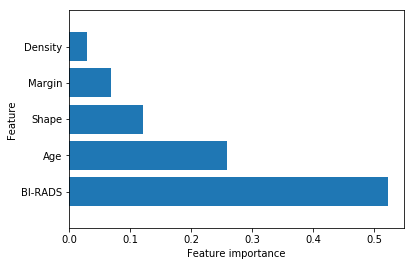

array([ 0.52311649,  0.25796299,  0.12117773,  0.06832808,  0.02941472])

In [16]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(model):
    columns = ["BI-RADS", "Age", "Shape", "Margin", "Density"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances(tree)
tree.feature_importances_

### Analisando a árvore de decisao

In [ ]:
# Class: benign=0 or malignant
Class = ["benign","malignant"]
features = ["BI-RADS", "Age", "Shape", "Margin", "Density"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["benign", "malignant",],
                feature_names=features, impurity=False, filled=True)

In [ ]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
# !pip install graphviz

import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))